# Schelling model

1.
N = 1000-4000
nbh=1
th=.5

2. 
N = 1000-4000
nbh=1
th=3/8, 6/8

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from schelling_model import SchellingModel, SchellingModelWithSave

# Gif scenarios

In [16]:
giff1 = SchellingModelWithSave(sizes = (2500, 2500), th = (.5, .5), nbh = (1, 1))
giff1.simulate()

In [17]:
def make_animation(state, step):
    plt.clf()  
    plt.title(f"State at {step} time step")
    sns.heatmap(state, vmin=-1, vmax=1, cmap=['skyblue', 'black', 'hotpink'])
    return plt

In [18]:
def animate(step):
    make_animation(giff1.history[step], step)

fig = plt.figure()
anim = FuncAnimation(fig, animate, frames=len(giff1.history), interval=3, repeat=False)
anim.save("state_1.gif")
plt.close(fig)

In [19]:
giff2 = SchellingModelWithSave(sizes = (2500, 2500), th = (3/8, 6/8), nbh = (1, 1))
giff2.simulate()

In [20]:
def animate(step):
    make_animation(giff2.history[step], step)

fig = plt.figure()
anim = FuncAnimation(fig, animate, frames=len(giff2.history), interval=3, repeat=False)
anim.save("state_2.gif")
plt.close(fig)

In [21]:
giff3 = SchellingModelWithSave(sizes = (250, 250), th = (.5, .5), nbh = (1, 1))
giff3.simulate()

In [22]:
def animate(step):
    make_animation(giff3.history[step], step)

fig = plt.figure()
anim = FuncAnimation(fig, animate, frames=len(giff3.history), interval=3, repeat=False)
anim.save("state_3.gif")
plt.close(fig)

# Plot time it took to solve with respect to the number of agent $N=N_b=N_r$

In [23]:
n_sizes = np.linspace(250, 4000, 100)
M = 100
times = []
sni = []
for i in n_sizes:
    print(i)
    temp = SchellingModel(sizes = (i, i), th = (.5, .5), nbh = (1, 1))
    temp.simulate(100)
    times.append(temp.t)
    sni.append(temp.sni)

250.0
287.8787878787879
325.75757575757575
363.6363636363636
401.5151515151515
439.3939393939394
477.27272727272725
515.1515151515151
553.030303030303
590.9090909090909
628.7878787878788
666.6666666666666
704.5454545454545
742.4242424242424
780.3030303030303
818.1818181818181
856.060606060606
893.9393939393939
931.8181818181818
969.6969696969696
1007.5757575757575
1045.4545454545455
1083.3333333333333
1121.212121212121
1159.090909090909
1196.969696969697
1234.8484848484848
1272.7272727272725
1310.6060606060605
1348.4848484848485
1386.3636363636363
1424.242424242424
1462.121212121212
1500.0
1537.8787878787878
1575.7575757575755
1613.6363636363635
1651.5151515151515
1689.3939393939393
1727.272727272727
1765.151515151515
1803.030303030303
1840.9090909090908
1878.7878787878785
1916.6666666666665
1954.5454545454545
1992.4242424242423
2030.30303030303
2068.181818181818
2106.060606060606
2143.939393939394
2181.8181818181815
2219.6969696969695
2257.5757575757575
2295.454545454545
2333.33333333

In [27]:
np.save('n_size_times', times)
np.save('n_size_snis', sni)

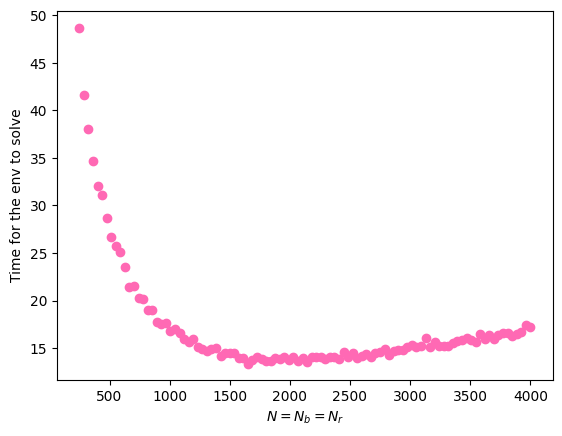

In [24]:
plt.scatter(n_sizes.astype(int), times, color='hotpink')
plt.xlabel('$N=N_b=N_r$')
plt.ylabel('Time for the env to solve')
plt.show()

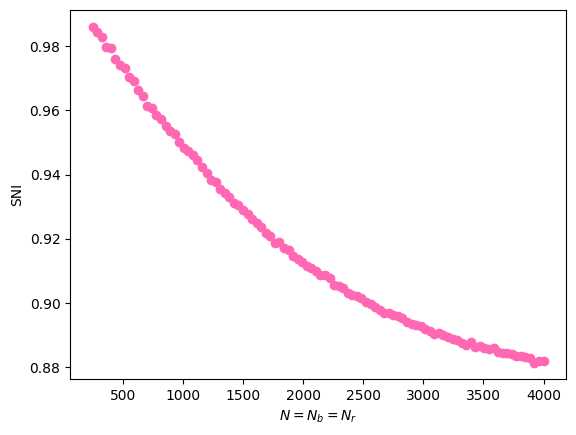

In [25]:
plt.scatter(n_sizes, sni, color='hotpink')
plt.xlabel('$N=N_b=N_r$')
plt.ylabel('SNI')
plt.show()

# Change preferences

In [26]:
th_sizes = np.linspace(0.1, 0.8, 20)
M = 100
times_th1000 = []
sni_th1000 = []
for i in th_sizes:
    print(i)
    temp = SchellingModel(sizes = (1000, 1000), th = (i, i), nbh = (1, 1))
    temp.simulate(100)
    times_th1000.append(temp.t)
    sni_th1000.append(temp.sni)

0.1
0.1368421052631579
0.1736842105263158
0.2105263157894737
0.2473684210526316
0.28421052631578947
0.32105263157894737
0.35789473684210527
0.39473684210526316
0.43157894736842106
0.46842105263157896
0.5052631578947369
0.5421052631578948
0.5789473684210527
0.6157894736842106
0.6526315789473685
0.6894736842105263
0.7263157894736842
0.7631578947368421
0.8


In [32]:
np.save('th_size_times1000', np.asarray(times_th1000))
np.save('th_size_snis1000', np.asarray(sni_th1000))

In [28]:
th_sizes = np.linspace(0.1, 0.8, 20)
M = 100
times_th3000 = []
sni_th3000 = []
for i in th_sizes:
    print(i)
    temp = SchellingModel(sizes = (3000, 3000), th = (i, i), nbh = (1, 1))
    temp.simulate(100)
    times_th3000.append(temp.t)
    sni_th3000.append(temp.sni)

0.1
0.1368421052631579
0.1736842105263158
0.2105263157894737
0.2473684210526316
0.28421052631578947
0.32105263157894737
0.35789473684210527
0.39473684210526316
0.43157894736842106
0.46842105263157896
0.5052631578947369
0.5421052631578948
0.5789473684210527
0.6157894736842106
0.6526315789473685
0.6894736842105263
0.7263157894736842
0.7631578947368421
0.8


In [31]:
np.save('th_size_times3000', np.asarray(times_th3000))
np.save('th_size_snis3000', np.asarray(sni_th3000))

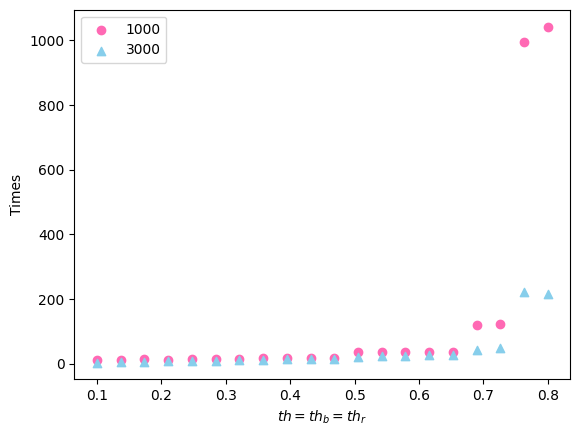

In [29]:
plt.scatter(th_sizes, times_th1000, color='hotpink', marker='o', label=1000)
plt.scatter(th_sizes, times_th3000, color='skyblue', marker='^', label=3000)
plt.xlabel('$th=th_b=th_r$')
plt.ylabel('Times')
plt.legend()
plt.show()

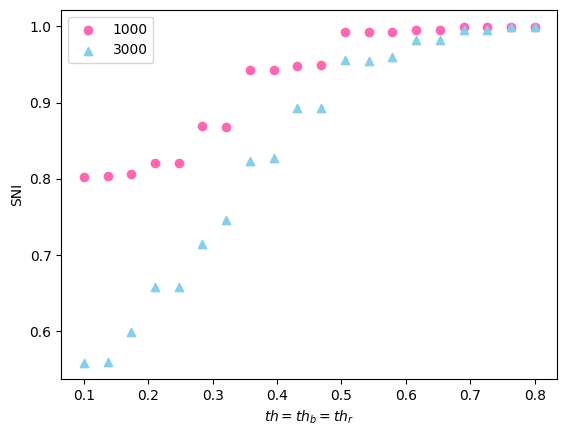

In [30]:
plt.scatter(th_sizes, sni_th1000, color='hotpink', marker='o', label=1000)
plt.scatter(th_sizes, sni_th3000, color='skyblue', marker='^', label=3000)
plt.xlabel('$th=th_b=th_r$')
plt.ylabel('SNI')
plt.legend()
plt.show()

# Change nbh size

In [8]:
nbh_sizes = range(1,6)
M = 100
times_nbh1000 = []
sni_nbh1000 = []
for i in nbh_sizes:
    print(i)
    temp = SchellingModel(sizes = (1000, 1000), th = (.5, .5), nbh = (i, i))
    temp.simulate(100)
    times_nbh1000.append(temp.t)
    sni_nbh1000.append(temp.sni)

1
2
3
4
5


In [11]:
np.save('nbh_size_times1000', np.asarray(times_nbh1000))
np.save('nbh_size_snis1000', np.asarray(sni_nbh1000))

In [4]:
from schelling_model import SchellingModel
import numpy as np
from matplotlib import pyplot as plt

In [11]:
nbh_sizes = range(1,6)
M = 100
times_nbh3000 = []
sni_nbh3000 = []
for i in nbh_sizes:
    print(i)
    temp = SchellingModel(sizes = (3000, 3000), th = (.5, .5), nbh = (i, i))
    temp.simulate(100)
    times_nbh3000.append(temp.t)
    sni_nbh3000.append(temp.sni)

1
2
3
4
5


In [16]:
np.save('nbh_size_times3000', np.asarray(times_nbh3000))
np.save('nbh_size_snis3000', np.asarray(sni_nbh3000))

In [7]:
times_nbh1000 = np.load('nbh_size_times1000.npy')
sni_nbh1000 = np.load('nbh_size_snis1000.npy')

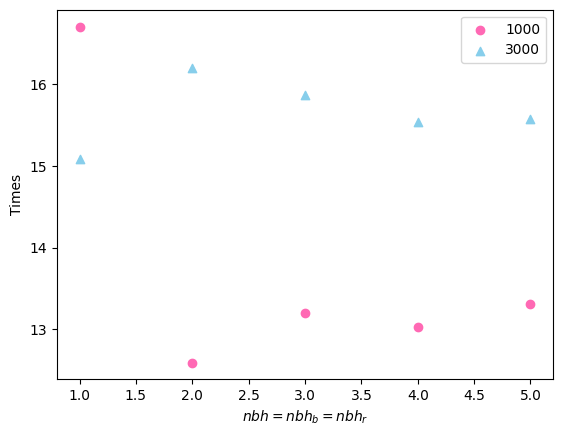

In [12]:
plt.scatter(nbh_sizes, times_nbh1000, color='hotpink', marker='o', label=1000)
plt.scatter(nbh_sizes, times_nbh3000, color='skyblue', marker='^', label=3000)
plt.xlabel('$nbh=nbh_b=nbh_r$')
plt.ylabel('Times')
plt.legend()
plt.show()

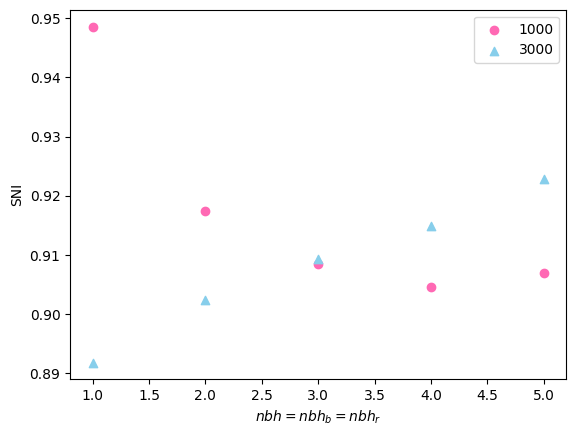

In [13]:
plt.scatter(nbh_sizes, sni_nbh1000, color='hotpink', marker='o', label=1000)
plt.scatter(nbh_sizes, sni_nbh3000, color='skyblue', marker='^', label=3000)
plt.xlabel('$nbh=nbh_b=nbh_r$')
plt.ylabel('SNI')
plt.legend()
plt.show()